## Problem Statment

#### In the competitive retail industry, understanding customer behavior, sales trends, and product performance is crucial for maximizing profitability and improving customer satisfaction. This project aims to analyze the sales data from a supermarket to uncover insights that can guide strategic decisions. 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('supermarket_sales.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df=df.drop(['Invoice ID','Date','Time'],axis=1)

In [8]:
## cost of good sold
df['gross margin percentage'].unique()


array([4.76190476])

##### Their is only one unique value in gross margin percentage that is 4.76, so it means that this column is also not useful if all the values are same.
##### so thats why we drop this column

In [9]:
df = df.drop(['gross margin percentage'],axis=1)

In [10]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3


## Data Visualization

In [11]:
print(df.shape)

(1000, 13)


In [12]:
df['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

### Thier are 501 females and 499 males so it shows that male have purchased less from that supermarket than females

<Axes: xlabel='Gender', ylabel='count'>

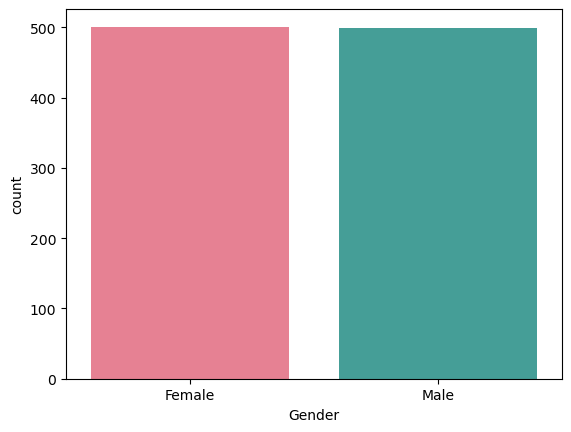

In [13]:
sns.countplot(x='Gender', data = df,palette='husl')

#### Their is very small gap betwween female and male , only a gap of two customersIt shows that more bills are given to the females from that supermarket.

## Creating dummies for Gender column for getting numeric data for seaborn bar plot

In [14]:
gender_dummies = pd.get_dummies(df['Gender'],dtype=int)
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


#### For creating Barplot we need a numeric data we cannot give strings to it so thats why as we can see in our data 
#### the gender column is given females and males so they are strings so that why we are creating dummies that is we are doing One Hot encoding so that our Gender column gets converted into numeric data that is 0 and 1. if Female will be there then it will show 1 and if male will be there then it show 0.

## Joining original data frame with Gender Dummies data frame(gender_dummies)

In [15]:
df = pd.concat([df, gender_dummies],axis=1)

In [16]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1


#### We can see their are two more columns are added female and male

<Axes: xlabel='Product line', ylabel='Female'>

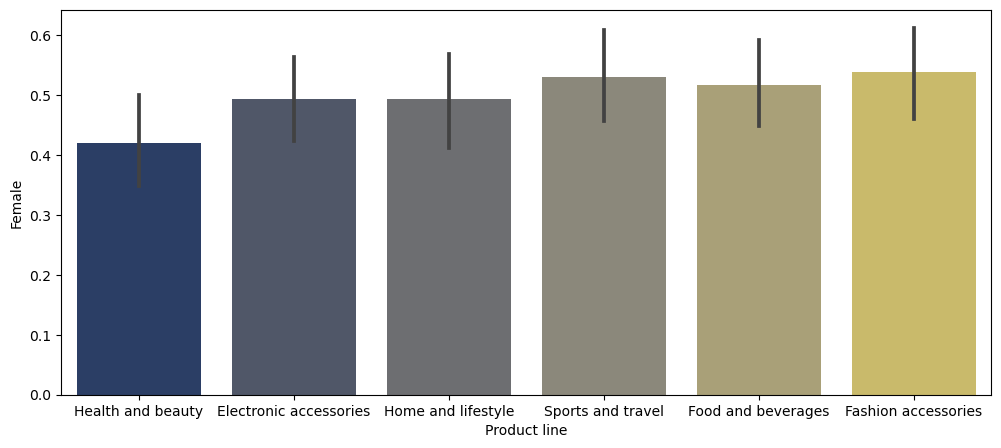

In [17]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'Product line',y = 'Female', data= df,palette='cividis')

#### This graph shows us that females have purchased more in Fashion accessories so more than 50 % of the bills of fashion accessories are given to females. Also in Health and beauty females have purchased less almost around 43% of the bills of Health and beauty are given to the females.

<Axes: xlabel='Product line', ylabel='Male'>

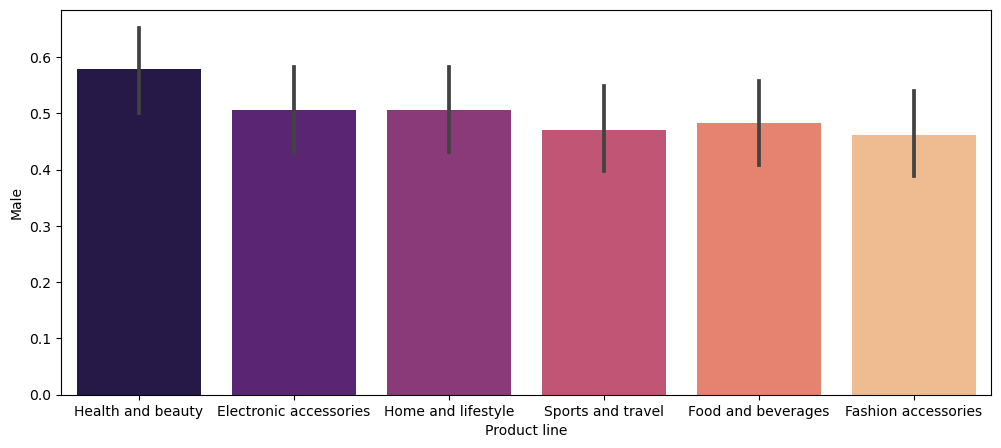

In [18]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'Product line',y = 'Male', data= df,palette='magma')

#### Here we can see Health and beauty is a longer building because 43 %  bills are given to the females ,so the rest of the bills will be given to the males so thats why Heath and beauty part of male is more
#### but fashion accessories part of males are less because more than 50 bills are given to Females only.

## plotting Customers per city

In [19]:
place_counts = pd.DataFrame(df['City'].value_counts())
place_counts

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


##### New DataFrame i have created that is place_df which containing 
##### how many customers are there from each of the city Yangon, Mandalay and Naypyitaw.

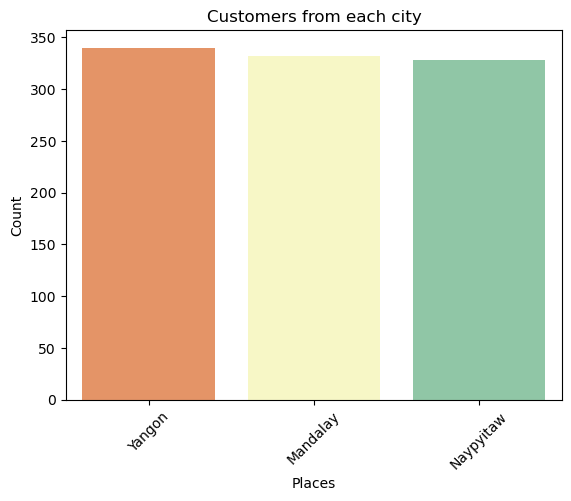

In [20]:
# Create a new dataframe from the value counts
place_df = pd.DataFrame(place_counts).reset_index()
place_df.columns = ['Places', 'Count']

sns.barplot(x='Places', y='Count', data=place_df, palette='Spectral')
plt.title('Customers from each city')
plt.xlabel('Places')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### It show that people comes more from Yungon city  supermarket

## Plotting different payment methods count

In [21]:
# Count the occurrences of each payment method
payment_counts = df['Payment'].value_counts()
payment_counts

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

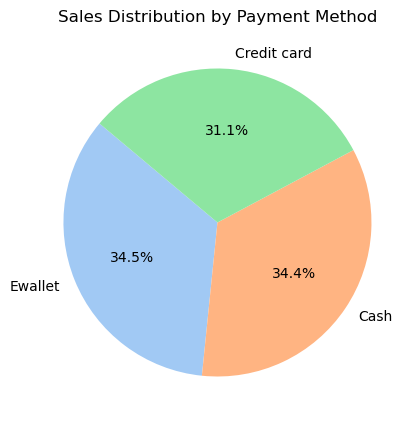

In [22]:
plt.figure(figsize=(18,5))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Payment Method')
plt.show()

#### It shows that e-wallet is the most famous payment option that is 345 bills are paid through e-wallet then 311 bills are paid through credit card and cash is 344.
#### Their is only one gap between e-wallet and cash

## Getting Gross Income Plot for each product line

<Axes: xlabel='Product line', ylabel='gross income'>

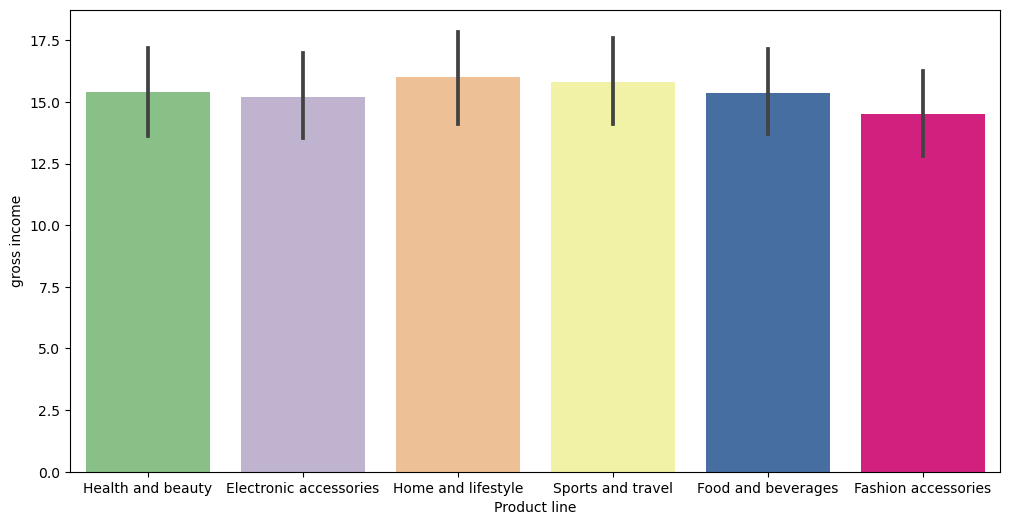

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x = df['Product line'], y = df['gross income'],palette='Accent')

#### By using this plot we can find which product line is earning the most profit.
#### Here,Home and lifestyle is earning the largest profit than the sports and travels and the fashion accessories is earning a little lesser then our income in comparision to the rest of the product line.
#### The Supermarket needs to work on the Fashion accessories and it should keep some offers on these fashion accessories so it also earn some more profits. 

## Total bill in each product line

<Axes: xlabel='Product line', ylabel='Total'>

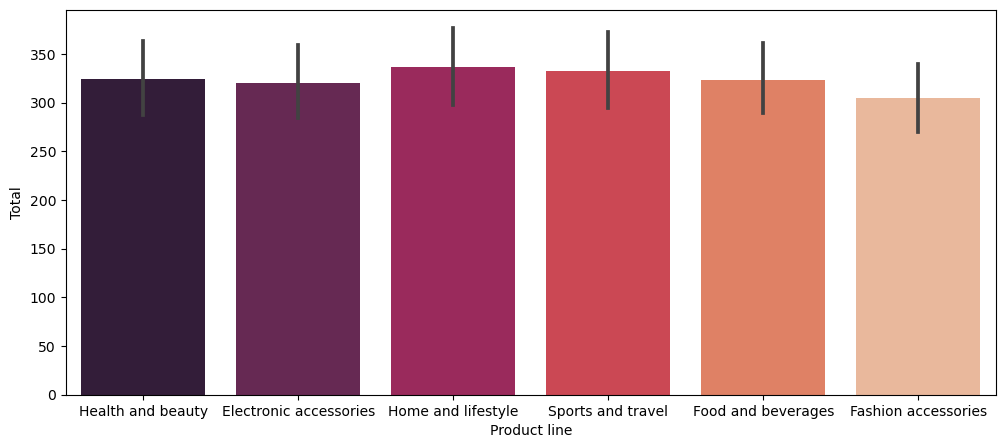

In [25]:
plt.figure(figsize = (12,5))
sns.barplot(x = df['Product line'], y = df['Total'],palette='rocket')

#### This plot shows that Home and lifestyle is having highest average bill or the cost at which the good is sold by the supermarket. and FAshion accessories is having minimum average bills.

## Exploring Quantity Column

In [26]:
quantity_count = pd.DataFrame(df['Quantity'].value_counts())
quantity_count

,count
Quantity,
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90


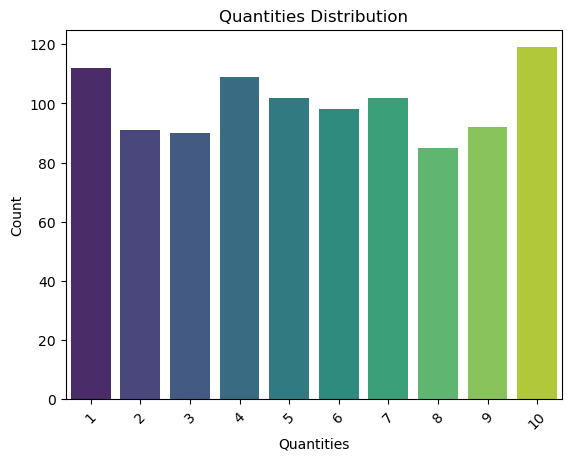

In [27]:
# Create a new dataframe from the value counts
quantity_df = pd.DataFrame(quantity_count).reset_index()
quantity_df.columns = ['Quantities', 'Count']

sns.barplot(x='Quantities', y='Count', data=quantity_df, palette='viridis')
plt.title('Quantities Distribution')
plt.xlabel('Quantities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### It shows that the Quantites between 9 to 10 are sold the most that means most of the customers usually buys some 9 to 10 quantities.
#### This will give an idea to the  supermarket owner that they can keep an offer if you will buy 10 quantities then you are going to get get one more free so that  if customers are buying 9 quantites so that they should  move to 10 so that they will get that offer.

## Customer Type Analysis:
 ### How does the average purchase amount vary between member and non-member customers?

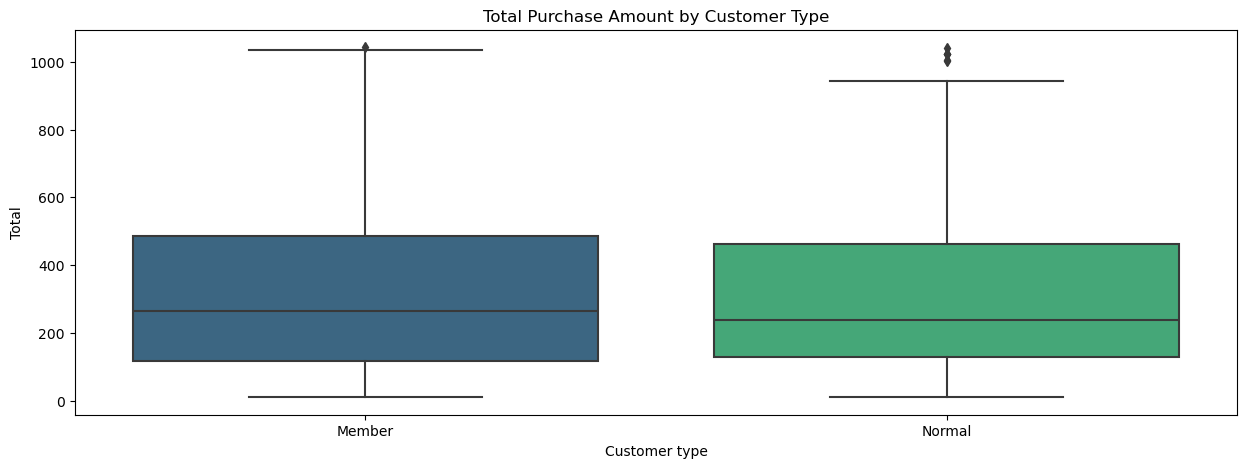

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Customer type', y='Total', data=df, palette='viridis')
plt.title('Total Purchase Amount by Customer Type')
plt.show()


#

#### Members and Normal customers spend similar amounts on average.
#### Members have a more consistent spending pattern with less variation in their purchases. Normal customers show more variation, with some making significantly larger purchases.
#### Members customers are More consistent in spending, but not necessarily higher spenders per purchase. Normal Customers Spend more variably, with occasional large purchases.
#### Its a good idea to the supermarket owner that they should Offer promotions to encourage Members to spend more.Convert Normal customers to Members to stabilize and potentially increase their spending.

## Product Line Performance Comparison:
### How does each product line perform in terms of average rating?

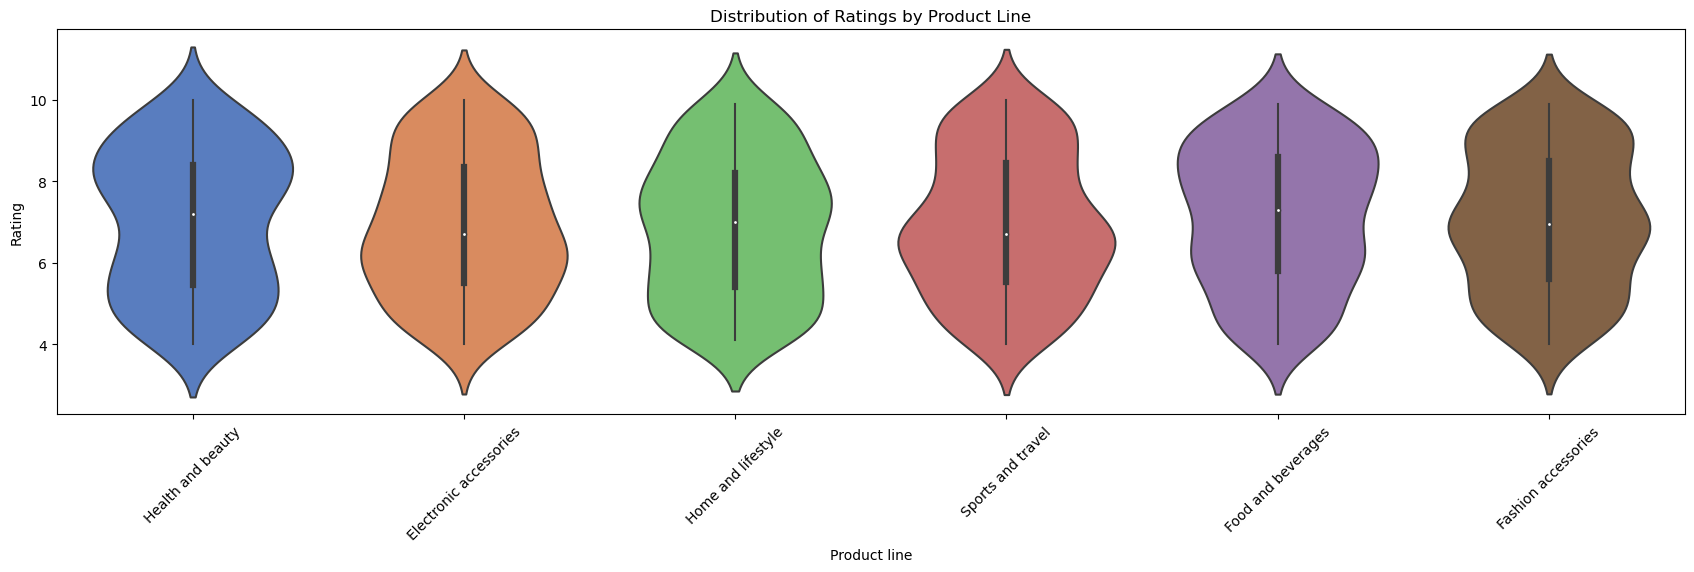

In [29]:
plt.figure(figsize=(21,5))
sns.violinplot(x='Product line', y='Rating', data=df, palette='muted')
plt.title('Distribution of Ratings by Product Line')
plt.xticks(rotation=45)
plt.show()


#### Most product lines have a median rating around 7. Health and Beauty has the widest range of ratings, indicating diverse customer opinions.
#### Its a good idea to the supermarket owner that they should Focus on improving lower-rated aspects of Health and Beauty products. Consistent median ratings suggest general satisfaction across product lines.

##  Total sales based on gender and customer type (Member vs. Normal):

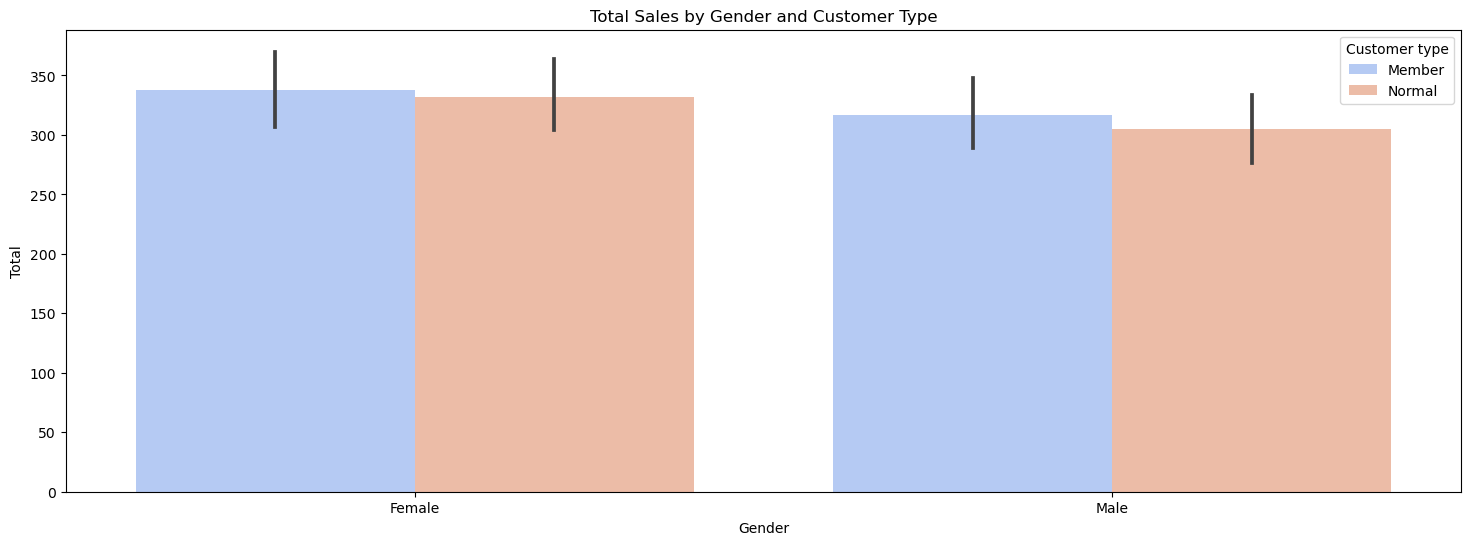

In [30]:
plt.figure(figsize=(18,6))
sns.barplot(x='Gender', y='Total', hue='Customer type', data=df, palette='coolwarm')
plt.title('Total Sales by Gender and Customer Type')
plt.show()


####  Both male and female Members spend slightly more than Normal customers.The spending pattern is consistent across genders, indicating no significant difference in total sales by gender.
#### Members, regardless of gender, tend to spend slightly more than Normal customers, showing the benefit of membership in driving sales.

## Total Transactions by Gender and Customer Type:

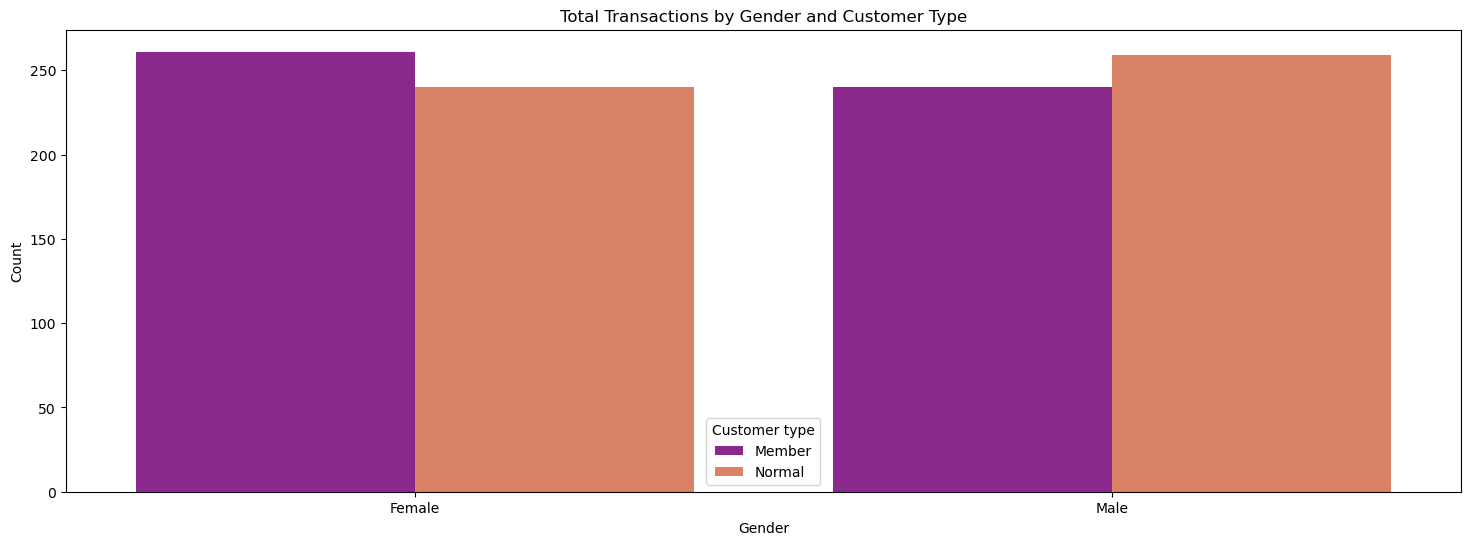

In [31]:
transaction_count = df.groupby(['Gender', 'Customer type']).size().reset_index(name='Count')

plt.figure(figsize=(18,6))
sns.barplot(x='Gender', y='Count', hue='Customer type', data=transaction_count, palette='plasma')
plt.title('Total Transactions by Gender and Customer Type')
plt.show()


#### Female Member customers have more transaction than the Normal customers, and Male Normal customers have mre transaction than member customers. 
#### Female Member customers have more transactions than Males, and Male Normal customers have more transactions than Female.

## Plotting Heatmap to check if any correlation between columns 

In [32]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1


<Axes: >

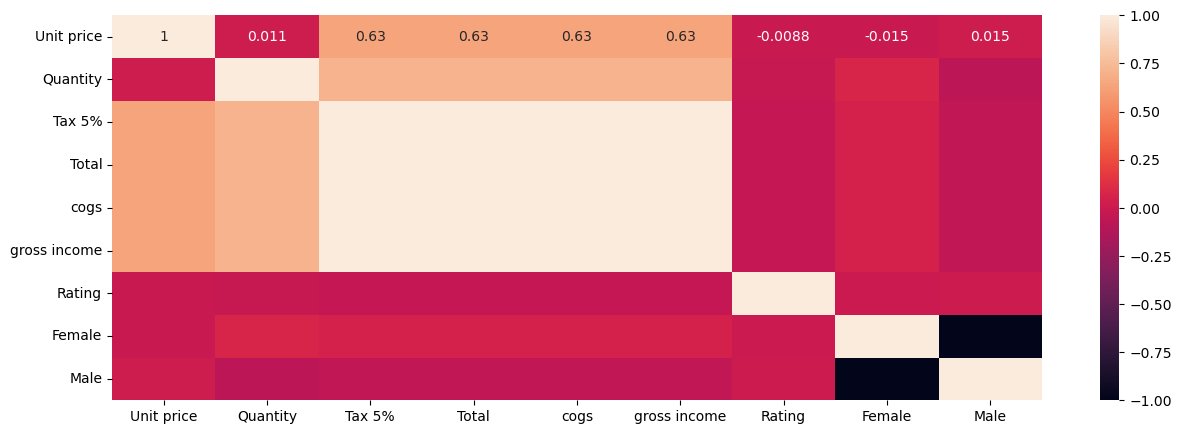

In [33]:
plt.figure(figsize = (15,5))
sns.heatmap(data=df[['Unit price','Quantity','Tax 5%','Total','cogs','gross income','Rating','Female','Male']].corr(),annot=True)

#### The strong positive correlation between Total and gross income (likely to be close to 1), suggesting that as the total value of transactions increases, the gross income also increases.
#### Weak correlations between Unit price and other variables like Rating, indicating that changes in Unit price don't significantly affect the Rating.
#### The correlation values and color gradient help identify which variables are strongly or weakly correlated, which can be useful for further analysis and decision-making.


## Inference from the Analysis

## Outcome:
#### The insights derived from this analysis will provide a comprehensive understanding of the supermarket's sales dynamics, customer preferences, and product performance. These insights can be leveraged to enhance marketing strategies, optimize inventory and pricing decisions, and ultimately drive better business outcomes.

#### By addressing these objectives, the supermarket can make data-driven decisions to improve operational efficiency, customer satisfaction, and overall profitability.